# <p style="background-color: #F4511E; font-family: Times New Roman; color: black; font-size: 140%; text-align: center; border-radius: 15px 15px; padding: 15px;"><strong>Academic Success Classification</strong></p>

<p class="author-card" style="border-radius: 25px; overflow: hidden; box-shadow: 0px 4px 20px rgba(0, 0, 0, 0.1); border: 3px solid #27AE60; background-color: #F5F5F5; padding: 30px; transition: transform 0.3s ease; font-family: Georgia; font-style: italic; font-weight: bold; font-size: 38px; text-align: center; background: linear-gradient(90deg, #FF0000, #FF7F00, #FFFF00, #00FF00, #00FFFF, #0000FF, #8B00FF, #FF0000); background-size: 200% 200%; -webkit-background-clip: text; color: transparent; animation: textGradient 10s linear infinite;">If you find my notebook helpful,<br>please consider giving an upvote.</p>

<style>
    p.author-card:hover {
        transform: translateY(-5px);
    }
    @keyframes textGradient {
        0% { background-position: 200% 50%; }
        100% { background-position: 0% 50%; }
    }
</style>

# <p style="background-color: #FDD835; font-family: Times New Roman; color: black; font-size: 120%; text-align: center; border-radius: 15px 15px; padding: 15px;"><strong>1. Data Loading and Overview</strong></p>

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Set the style of matplotlib
%matplotlib inline
plt.style.use('fivethirtyeight')

In [ ]:
# set data path
train_path = './playground-series-s4e6/train.csv'
test_path = './playground-series-s4e6/test.csv'

In [2]:
# Load training and testing datasets
# train = pd.read_csv('/kaggle/input/playground-series-s4e6/train.csv', index_col='id')
# test = pd.read_csv('/kaggle/input/playground-series-s4e6/test.csv', index_col='id')
train = pd.read_csv(train_path, index_col='id')
test = pd.read_csv(test_path, index_col='id')
train

Marital status  Application mode  Application order  Course  \
id                                                                   
0                   1                 1                  1    9238   
1                   1                17                  1    9238   
2                   1                17                  2    9254   
3                   1                 1                  3    9500   
4                   1                 1                  2    9500   
...               ...               ...                ...     ...   
76513               1                17                  1    9254   
76514               1                 1                  6    9254   
76515               5                17                  1    9085   
76516               1                 1                  3    9070   
76517               1                 1                  1    9773   

       Daytime/evening attendance  Previous qualification  \
id                                                          
0                               1                       1   
1                               1                       1   
2                               1                       1   
3                               1                       1   
4                               1                       1   
...                           ...                     ...   
76513                           1                       1   
76514                           1                       1   
76515                           1                       1   
76516                           1                       1   
76517                           1                       1   

       Previous qualification (grade)  Nacionality  Mother's qualification  \
id                                                                           
0                               126.0            1                       1   
1                               125.0            1                      19   
2                               137.0            1                       3   
3                               131.0            1                      19   
4                               132.0            1                      19   
...                               ...          ...                     ...   
76513                           121.0            1                      19   
76514                           125.0            1                       1   
76515                           138.0            1                      37   
76516                           136.0            1                      38   
76517                           133.1            1                      19   

       Father's qualification  ...  Curricular units 2nd sem (credited)  \
id                             ...                                        
0                          19  ...                                    0   
1                          19  ...                                    0   
2                          19  ...                                    0   
3                           3  ...                                    0   
4                          37  ...                                    0   
...                       ...  ...                                  ...   
76513                       1  ...                                    0   
76514                      38  ...                                    0   
76515                      37  ...                                    0   
76516                      37  ...                                    0   
76517                      19  ...                                    0   

       Curricular units 2nd sem (enrolled)  \
id                                           
0                                        6   
1                                        6   
2                                        6   
3                                        8   
4                                  

In [3]:
# Check if there are any missing values
train.isna().sum().sort_values(ascending=False)

Marital status                                    0
Age at enrollment                                 0
Curricular units 1st sem (credited)               0
Curricular units 1st sem (enrolled)               0
Curricular units 1st sem (evaluations)            0
Curricular units 1st sem (approved)               0
Curricular units 1st sem (grade)                  0
Curricular units 1st sem (without evaluations)    0
Curricular units 2nd sem (credited)               0
Curricular units 2nd sem (enrolled)               0
Curricular units 2nd sem (evaluations)            0
Curricular units 2nd sem (approved)               0
Curricular units 2nd sem (grade)                  0
Curricular units 2nd sem (without evaluations)    0
Unemployment rate                                 0
Inflation rate                                    0
GDP                                               0
International                                     0
Scholarship holder                                0
Application 

In [4]:
# Check if there are duplicate rows
train.duplicated().sum()

0

In [5]:
# View the general information of the training dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76518 entries, 0 to 76517
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  76518 non-null  int64  
 1   Application mode                                76518 non-null  int64  
 2   Application order                               76518 non-null  int64  
 3   Course                                          76518 non-null  int64  
 4   Daytime/evening attendance                      76518 non-null  int64  
 5   Previous qualification                          76518 non-null  int64  
 6   Previous qualification (grade)                  76518 non-null  float64
 7   Nacionality                                     76518 non-null  int64  
 8   Mother's qualification                          76518 non-null  int64  
 9   Father's qualification                      

In [6]:
# View the statistical description of training dataset
train.describe().T

count         mean  \
Marital status                                  76518.0     1.111934   
Application mode                                76518.0    16.054419   
Application order                               76518.0     1.644410   
Course                                          76518.0  9001.286377   
Daytime/evening attendance                      76518.0     0.915314   
Previous qualification                          76518.0     3.658760   
Previous qualification (grade)                  76518.0   132.378766   
Nacionality                                     76518.0     1.226600   
Mother's qualification                          76518.0    19.837633   
Father's qualification                          76518.0    23.425076   
Mother's occupation                             76518.0     8.583196   
Father's occupation                             76518.0     8.882172   
Admission grade                                 76518.0   125.363971   
Displaced                                       76518.0     0.569265   
Educational special needs                       76518.0     0.003738   
Debtor                                          76518.0     0.071382   
Tuition fees up to date                         76518.0     0.893646   
Gender                                          76518.0     0.315821   
Scholarship holder                              76518.0     0.247393   
Age at enrollment                               76518.0    22.278653   
International                                   76518.0     0.006626   
Curricular units 1st sem (credited)             76518.0     0.188871   
Curricular units 1st sem (enrolled)             76518.0     5.891516   
Curricular units 1st sem (evaluations)          76518.0     7.352362   
Curricular units 1st sem (approved)             76518.0     4.178520   
Curricular units 1st sem (grade)                76518.0     9.995862   
Curricular units 1st sem (without evaluations)  76518.0     0.057960   
Curricular units 2nd sem (credited)             76518.0     0.137053   
Curricular units 2nd sem (enrolled)             76518.0     5.933414   
Curricular units 2nd sem (evaluations)          76518.0     7.234468   
Curricular units 2nd sem (approved)             76518.0     4.007201   
Curricular units 2nd sem (grade)                76518.0     9.626085   
Curricular units 2nd sem (without evaluations)  76518.0     0.062443   
Unemployment rate                               76518.0    11.520340   
Inflation rate                                  76518.0     1.228218   
GDP                                             76518.0    -0.080921   

                                                        std    min  \
Marital status                                     0.441669   1.00   
Application mode                                  16.682337   1.00   
Application order                                  1.229645   0.00   
Course                                          1803.438531  33.00   
Daytime/evening attendance                         0.278416   0.00   
Previous qualification                             8.623774   1.00   
Previous qualification (grade)                    10.995328  95.00   
Nacionality                                        3.392183   1.00   
Mother's qualification                            15.399456   1.00   
Father's qualification                            14.921164   1.00   
Mother's occupation                               17.471591   0.00   
Father's occupation                               16.803940   0.00   
Admission grade                                   12.562328  95.00   
Displaced                                          0.495182   0.00   
Educational special needs                          0.061023   0.00   
Debtor                                             0.257463   0.00   
Tuition fees up to date                            0.308292   0.00   
Gender                                             0.464845   0.00   
Scholarship holder                                 0.43

In [7]:
# Store the names of feature columns
initial_features = list(test.columns)
initial_features

['Marital status',
 'Application mode',
 'Application order',
 'Course',
 'Daytime/evening attendance',
 'Previous qualification',
 'Previous qualification (grade)',
 'Nacionality',
 "Mother's qualification",
 "Father's qualification",
 "Mother's occupation",
 "Father's occupation",
 'Admission grade',
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'Age at enrollment',
 'International',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (without evaluations)',
 'Unemployment rate',
 'Inflation rat

# <p style="background-color: #FDD835; font-family: Times New Roman; color: black; font-size: 120%; text-align: center; border-radius: 15px 15px; padding: 15px;"><strong>2. Exploratory Data Analysis</strong></p>

In [8]:
# Print the number of unique values for each column
for col in train.columns:
    print(f'{col} has {train[col].nunique()} values')

Marital status has 6 values
Application mode has 22 values
Application order has 8 values
Course has 19 values
Daytime/evening attendance has 2 values
Previous qualification has 21 values
Previous qualification (grade) has 110 values
Nacionality has 18 values
Mother's qualification has 35 values
Father's qualification has 39 values
Mother's occupation has 40 values
Father's occupation has 56 values
Admission grade has 668 values
Displaced has 2 values
Educational special needs has 2 values
Debtor has 2 values
Tuition fees up to date has 2 values
Gender has 2 values
Scholarship holder has 2 values
Age at enrollment has 46 values
International has 2 values
Curricular units 1st sem (credited) has 21 values
Curricular units 1st sem (enrolled) has 24 values
Curricular units 1st sem (evaluations) has 36 values
Curricular units 1st sem (approved) has 23 values
Curricular units 1st sem (grade) has 1206 values
Curricular units 1st sem (without evaluations) has 12 values
Curricular units 2nd sem

In [9]:
# Classify columns for better visualization
# Categorical columns: if the number of unique values is 8 or fewer
cat_cols = [col for col in train.columns if train[col].nunique() <= 8]
# Numerical columns: if the number of unique values is 9 or more
num_cols = [col for col in train.columns if train[col].nunique() >= 9]

In [10]:
len(cat_cols)

11

In [11]:
len(num_cols)

26

# <p style="font-family: Times New Roman; font-weight: normal; letter-spacing: 2px; color: #43A047; font-size: 110%; text-align: left; padding: 0px; border-bottom: 2px solid #43A047"><strong>2.1 Target Distribution</strong></p>

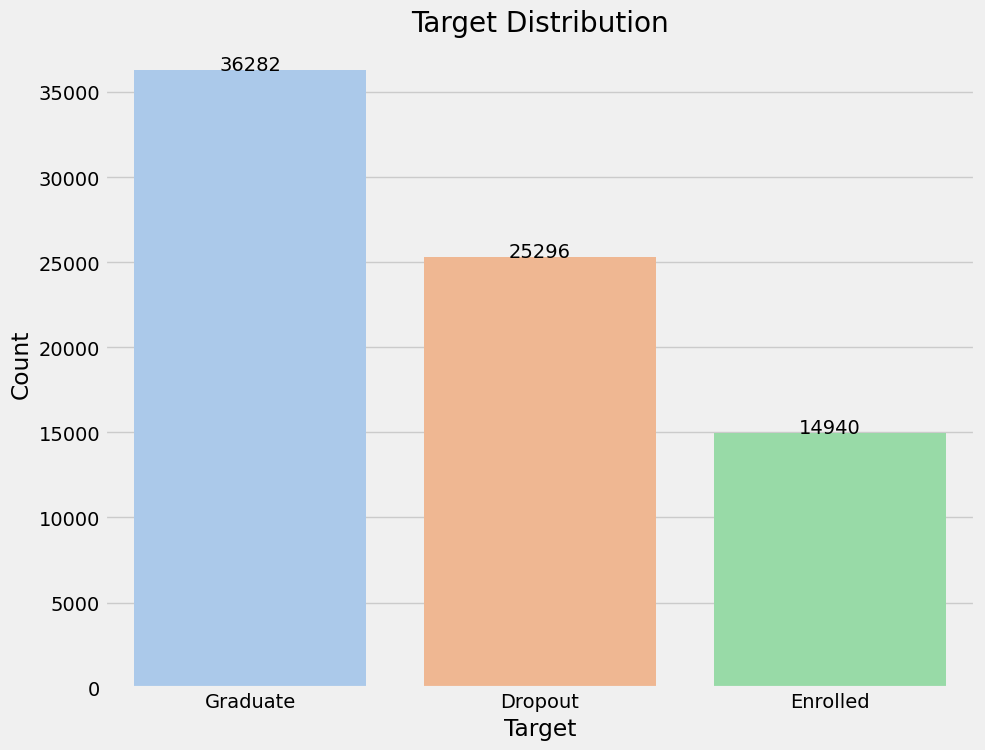

In [12]:
# Target distribution
# Set the figure size and create a count plot
plt.figure(figsize=(10, 8))
ax = sns.countplot(x='Target', data=train, palette='pastel')

# Add labels to each bar in the plot
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 3, f'{int(p.get_height())}', ha="center")

plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Target Distribution')
plt.show()

# <p style="font-family: Times New Roman; font-weight: normal; letter-spacing: 2px; color: #43A047; font-size: 110%; text-align: left; padding: 0px; border-bottom: 2px solid #43A047"><strong>2.2 Distribution of Categorical Variables</strong></p>

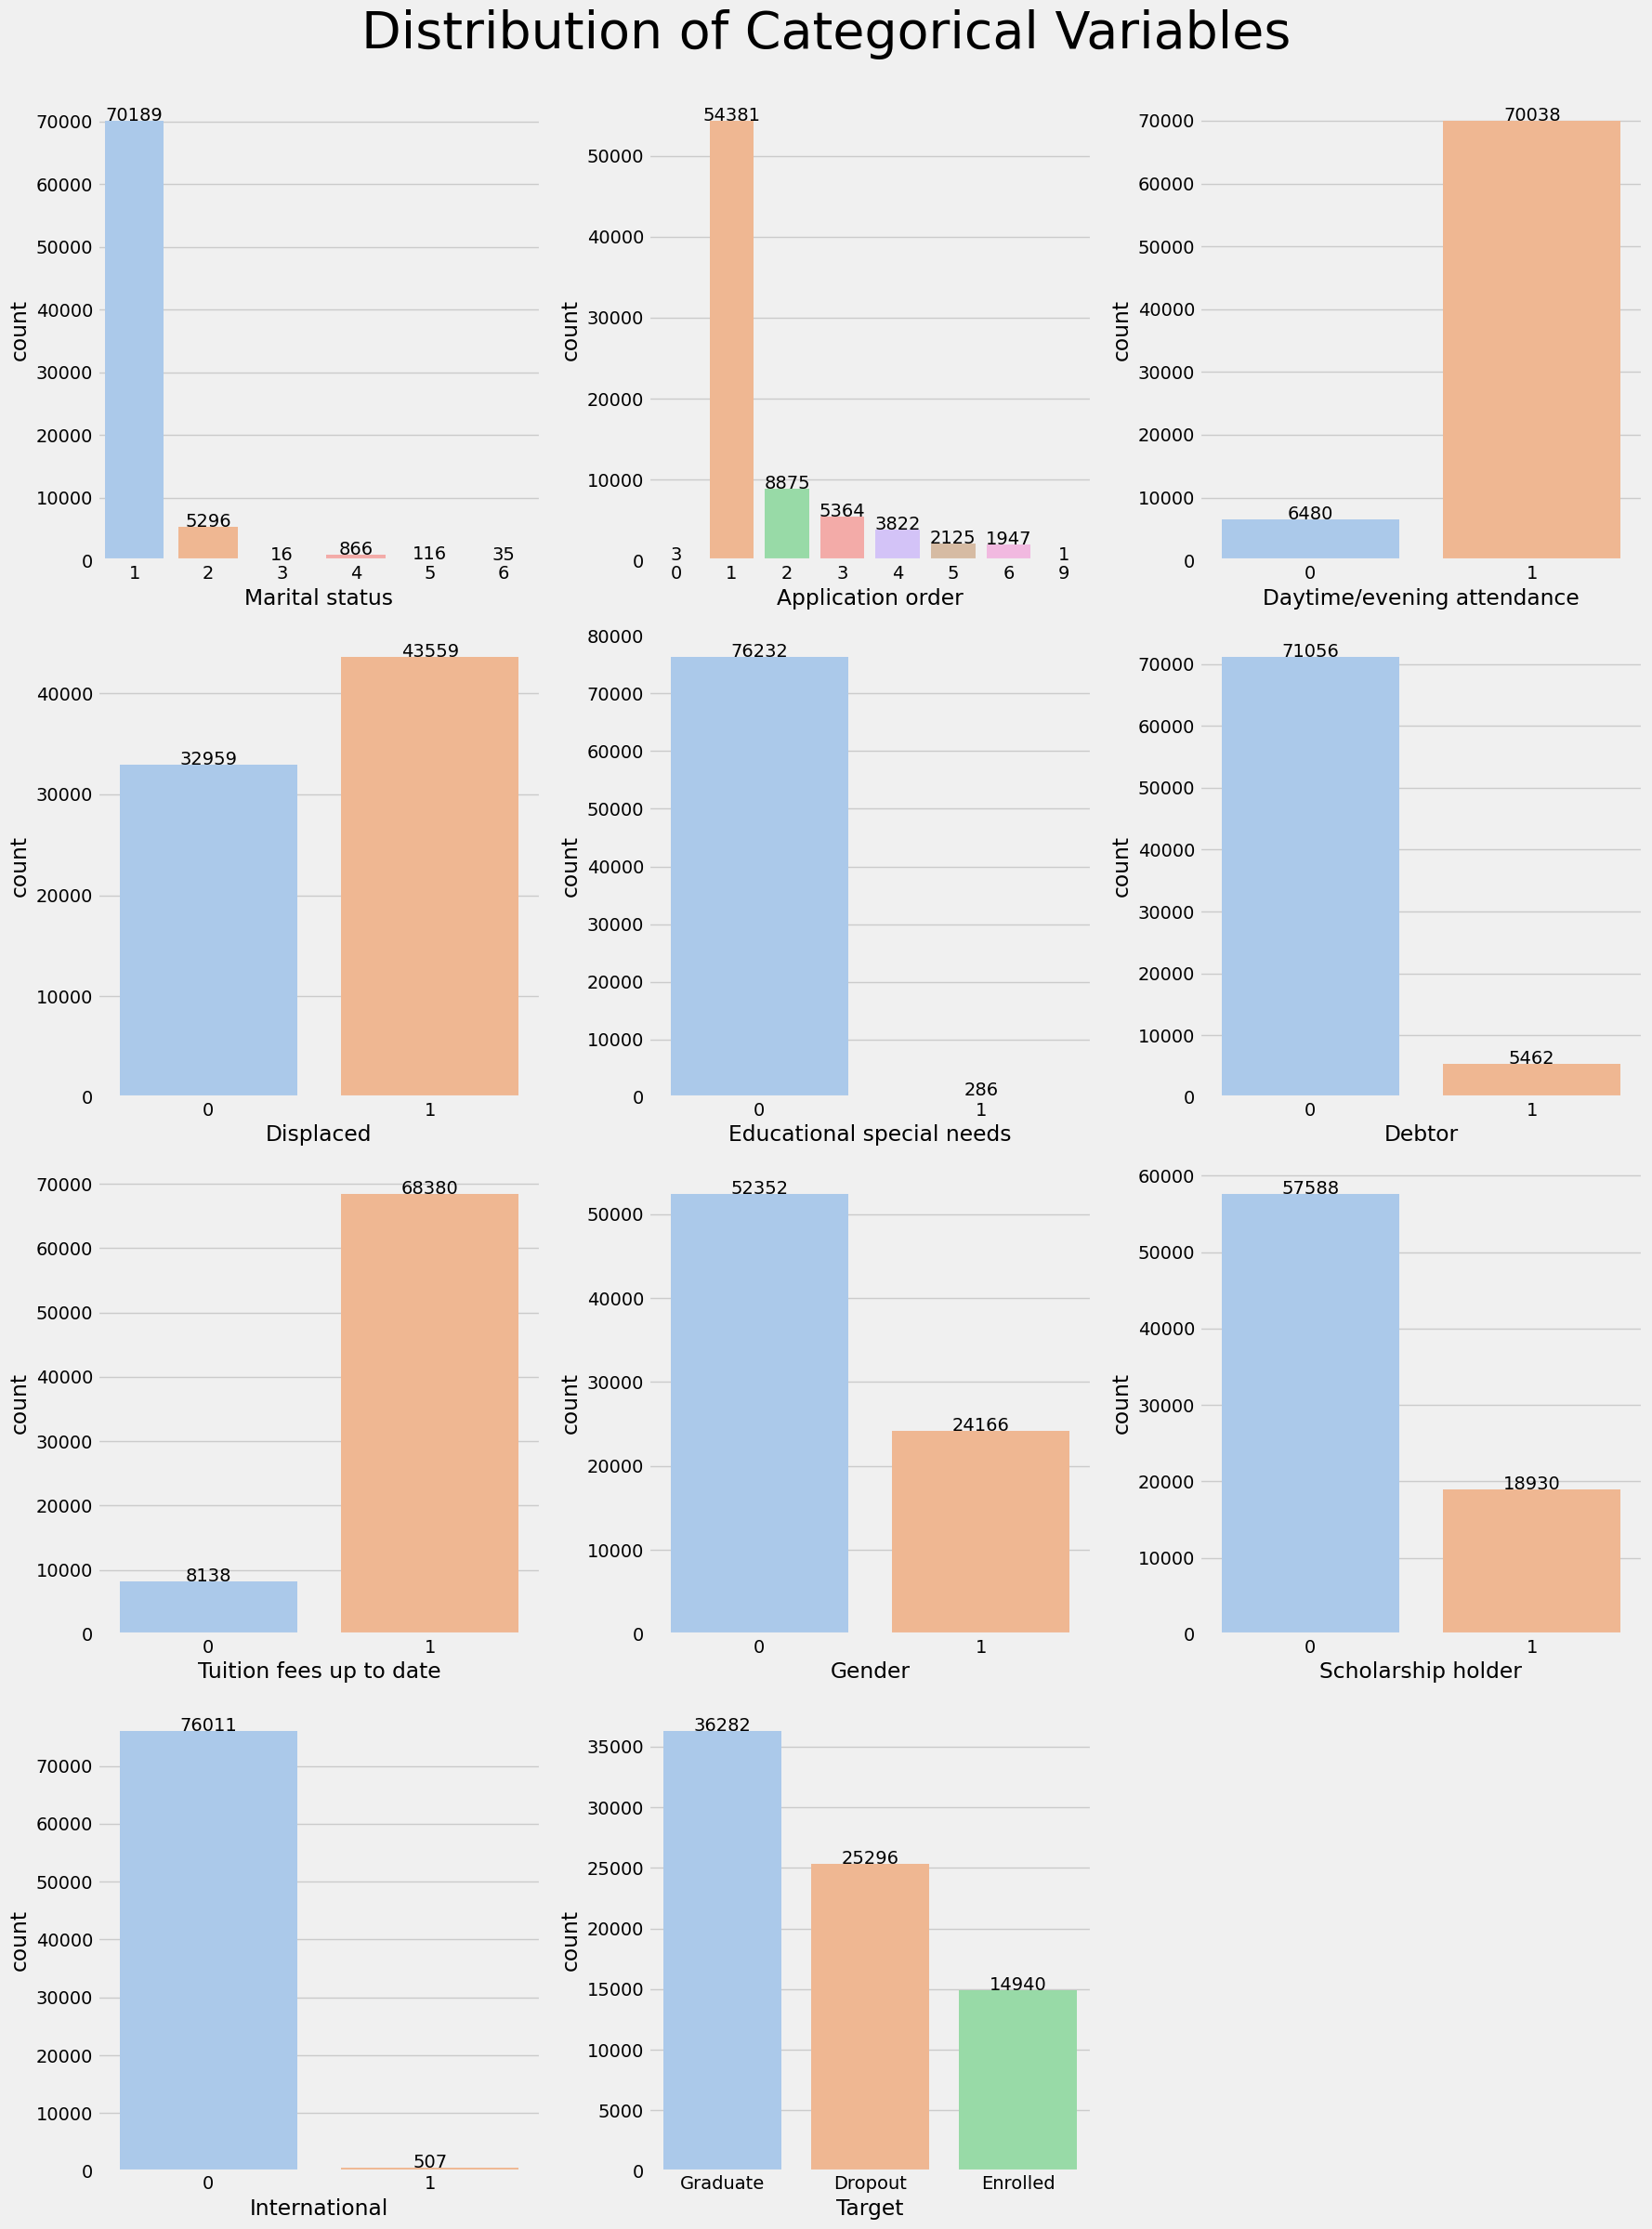

In [13]:
# Distribution of categorical variables
plt.figure(figsize=(18, 24))
plotnumber = 1

for col in cat_cols:
    if plotnumber <= len(cat_cols):
        ax = plt.subplot(4, 3, plotnumber)
        sns.countplot(x=train[col], data=train, palette='pastel')
        
        # Add labels to each bar in the plot
        for p in ax.patches:
            ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 3, f'{int(p.get_height())}', ha="center")
        
        plt.xlabel(col)
        # plt.xticks(rotation=45)
        plt.xlabel(col)
        
    plotnumber += 1

plt.suptitle('Distribution of Categorical Variables', fontsize=40, y=1)
plt.tight_layout()
plt.show()

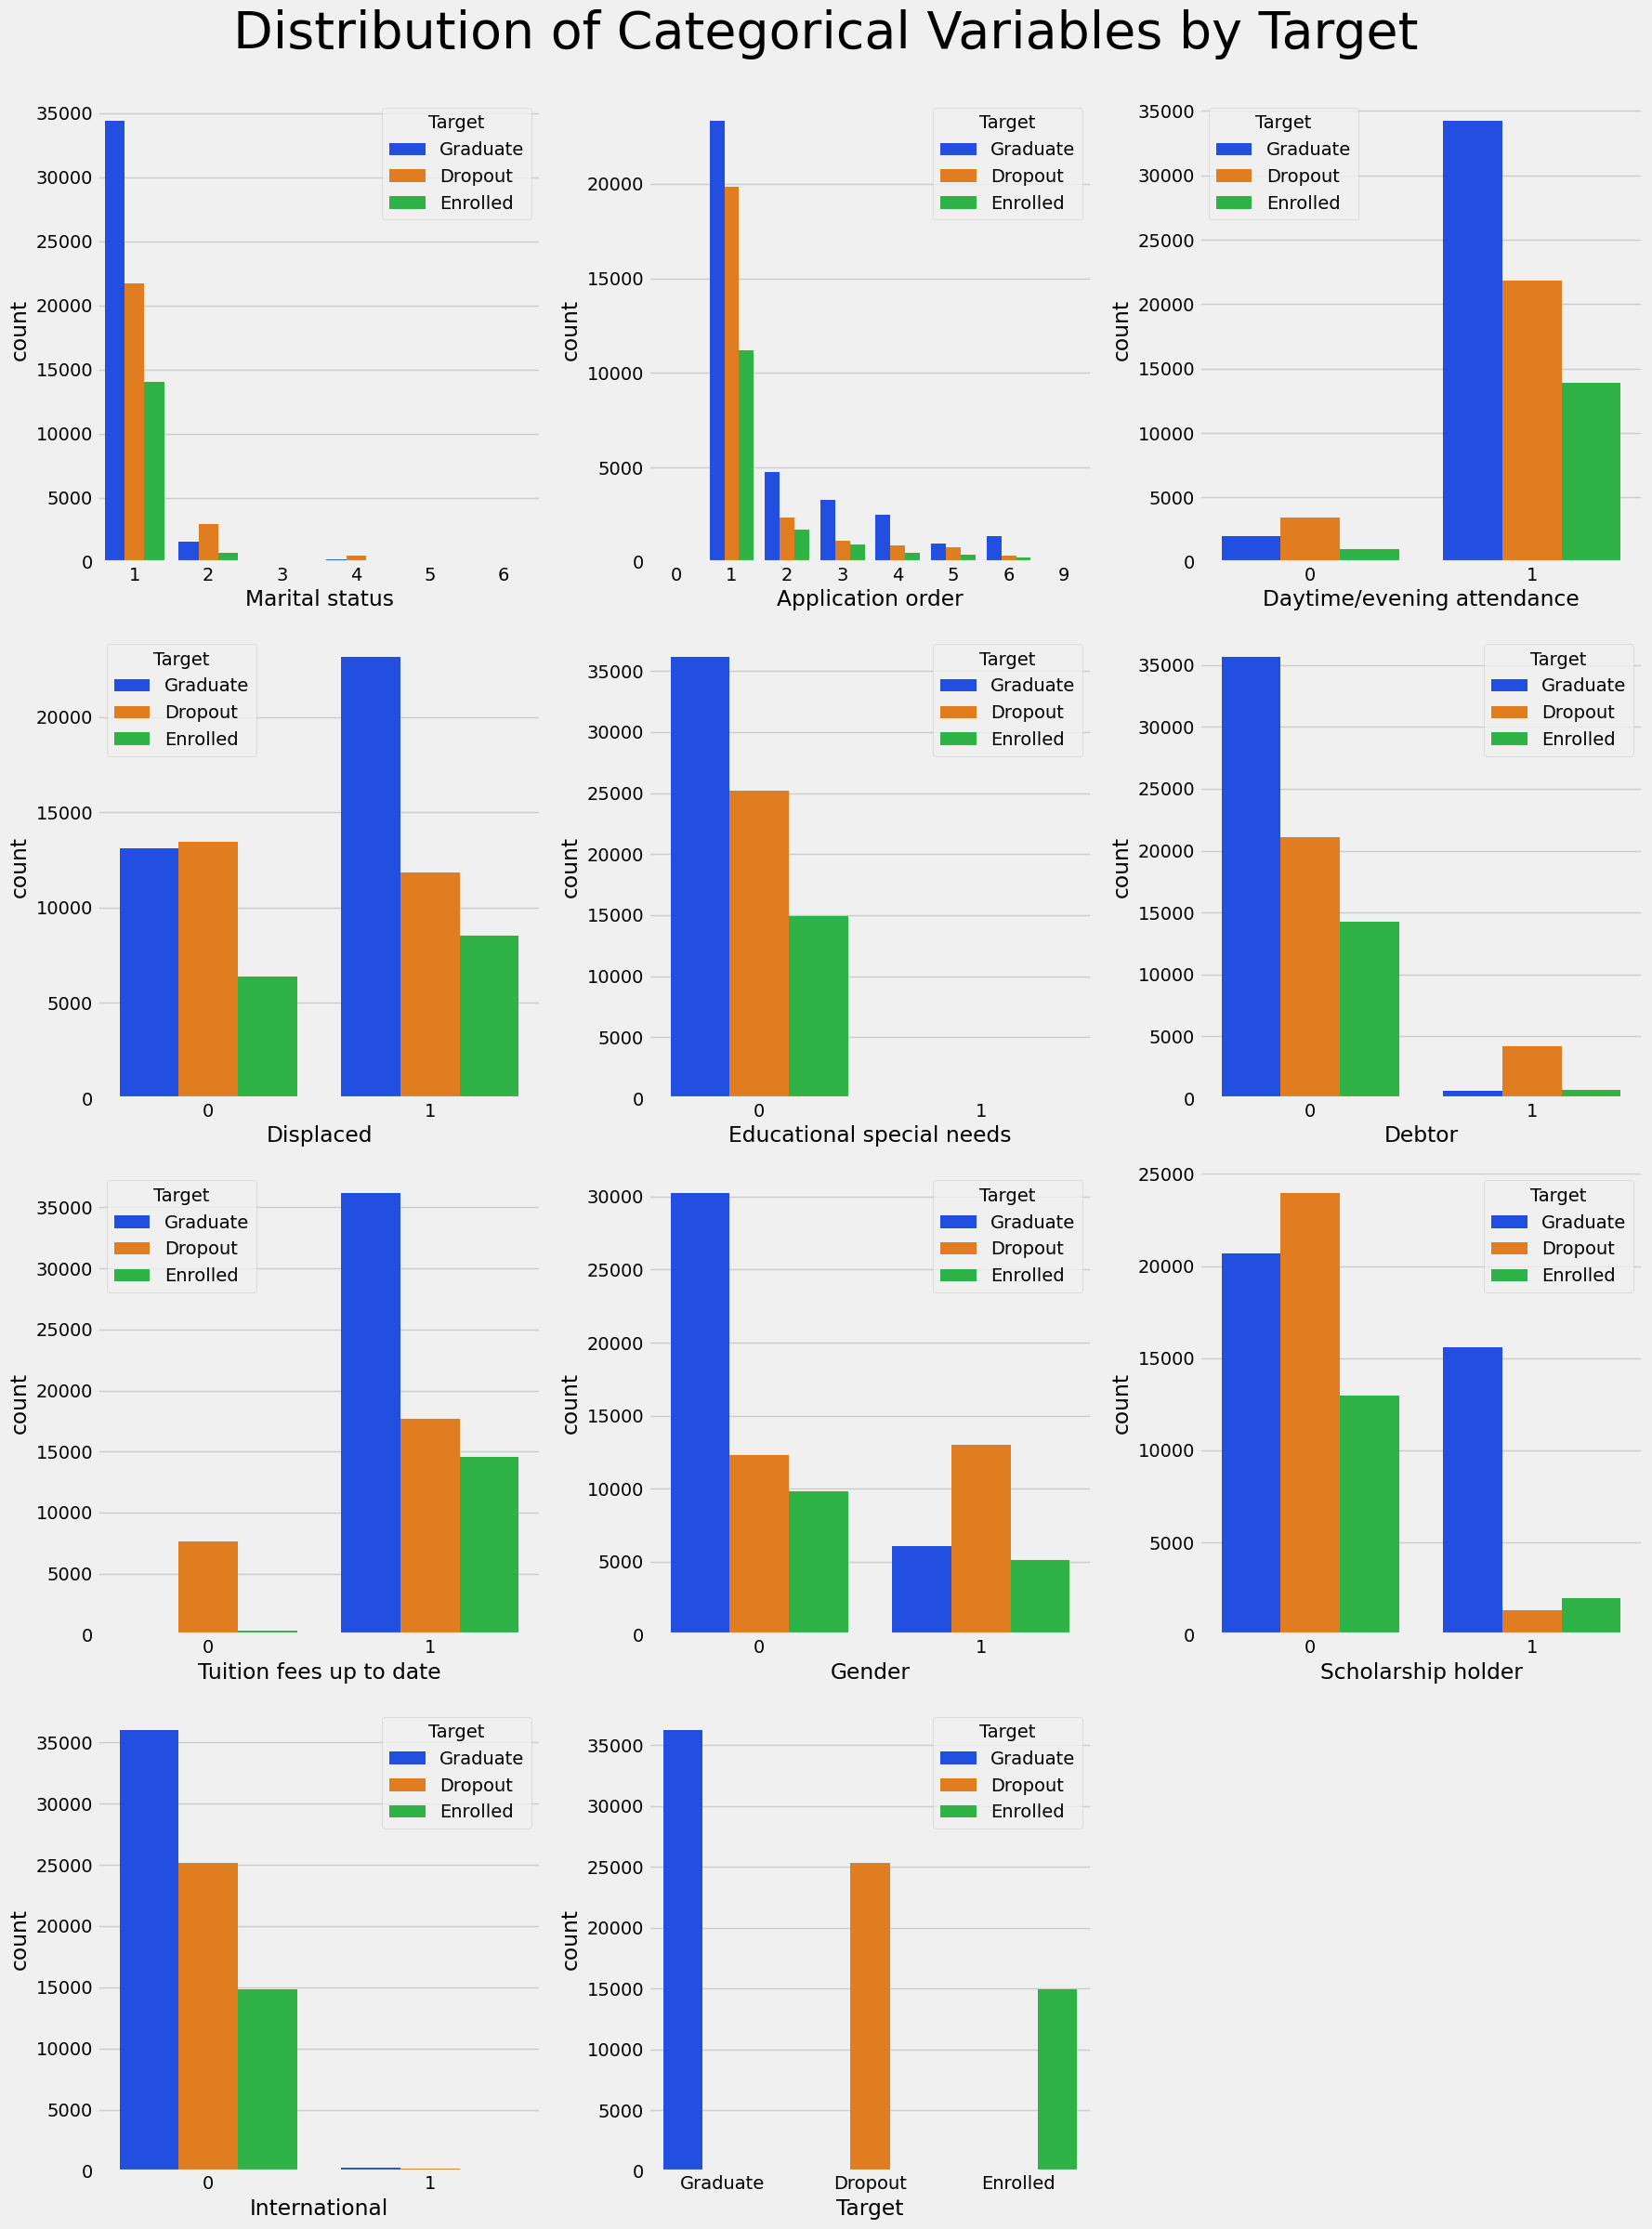

In [14]:
plt.figure(figsize=(18, 24))
plotnumber = 1

# Loop through each column
for col in cat_cols:
    if plotnumber <= len(cat_cols):
        plt.subplot(4, 3, plotnumber)
        ax = sns.countplot(x=train[col], hue=train['Target'], palette='bright')
        
    plotnumber += 1

plt.suptitle('Distribution of Categorical Variables by Target', fontsize=40, y=1)
plt.tight_layout()
plt.show()

# <p style="font-family: Times New Roman; font-weight: normal; letter-spacing: 2px; color: #43A047; font-size: 110%; text-align: left; padding: 0px; border-bottom: 2px solid #43A047"><strong>2.3 Distribution of Numerical Variables</strong></p>

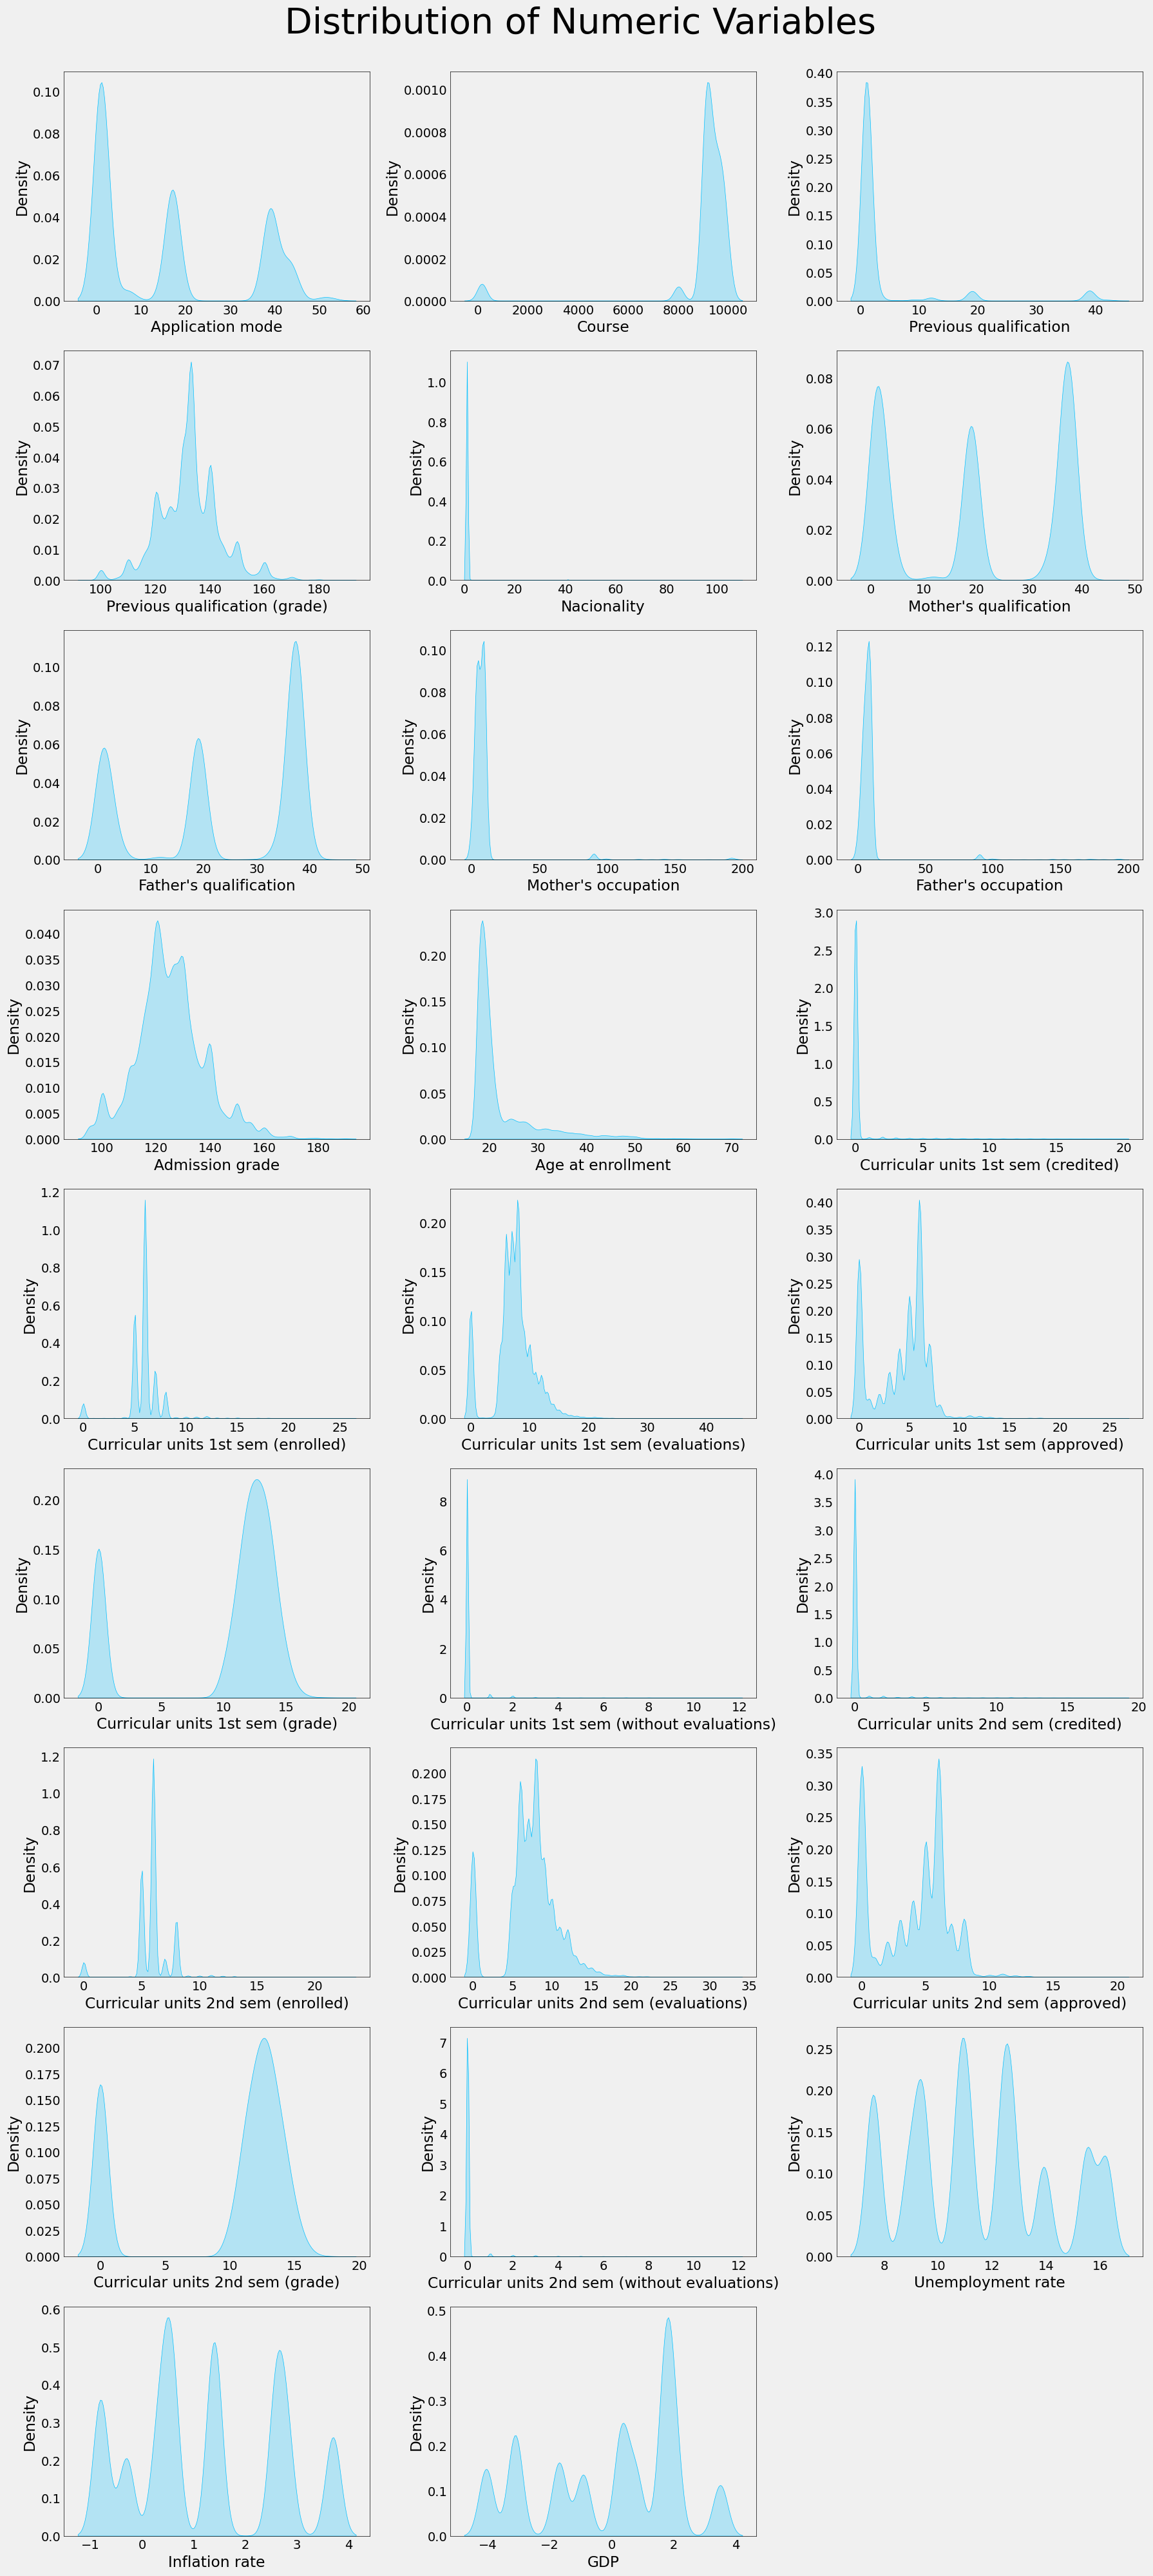

In [15]:
# Distribution of numeric variables
plt.figure(figsize=(18, 40))
plotnumber = 1

for column in num_cols:
    if plotnumber <= len(num_cols):
        ax = plt.subplot(9, 3, plotnumber)
        sns.kdeplot(train[column], color='deepskyblue', fill=True)
        for spine in ax.spines.values():
            spine.set_visible(True)
            spine.set_color('black')
            spine.set_linewidth(0.5)
        plt.xlabel(column)
        ax.grid(False)
        
    plotnumber += 1

plt.suptitle('Distribution of Numeric Variables', fontsize=40, y=1)
plt.tight_layout()
plt.show()

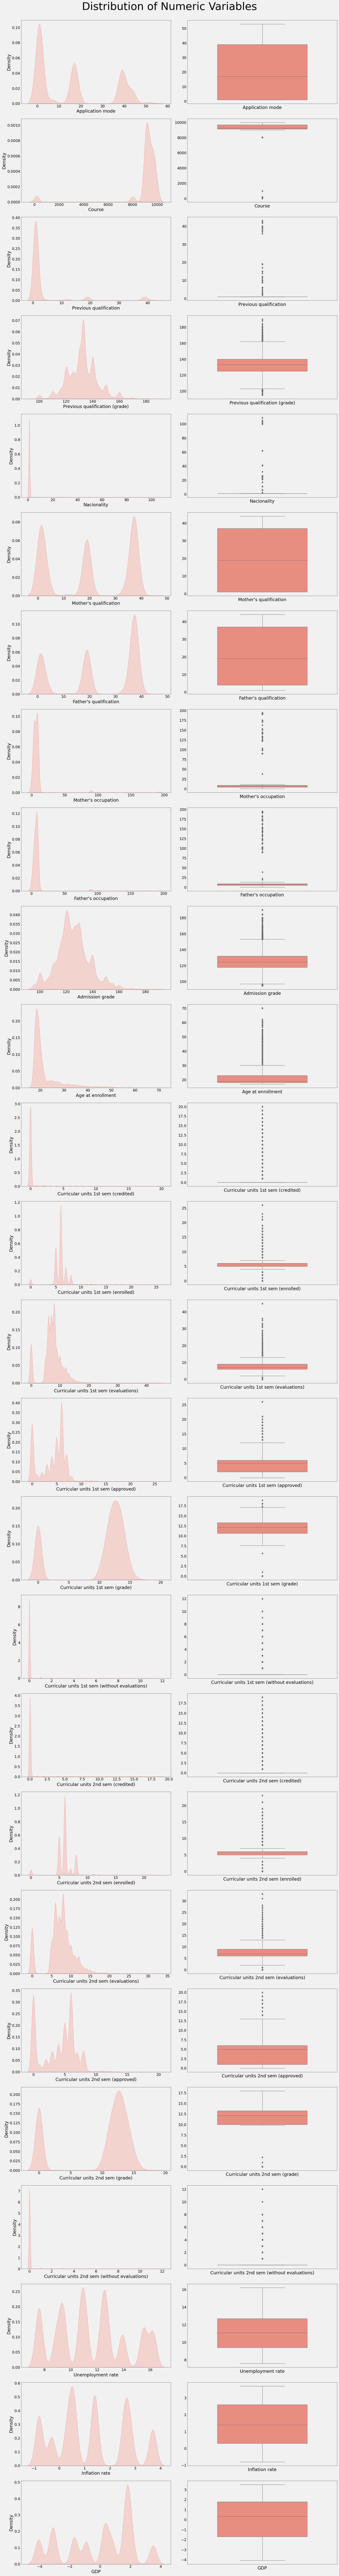

In [16]:
plt.figure(figsize=(18, 135))
plotnumber = 1

for col in num_cols:
    if plotnumber <= len(num_cols):
        
        ax1 = plt.subplot(len(num_cols), 2, 2 * plotnumber - 1)
        sns.kdeplot(train[col], color='salmon', fill=True)
        for spine in ax1.spines.values():
            spine.set_visible(True)
            spine.set_color('black')
            spine.set_linewidth(0.5)
        ax1.set_xlabel(col)
        ax1.grid(False)
        
        ax2 = plt.subplot(len(num_cols), 2, 2 * plotnumber)
        sns.boxplot(y=train[col], color='salmon', width=0.6, linewidth=1)
        for spine in ax2.spines.values():
            spine.set_visible(True)
            spine.set_color('black')
            spine.set_linewidth(0.5)
        ax2.set_xlabel(col)
        ax2.set_ylabel('')
        ax2.grid(False)

    plotnumber += 1

plt.suptitle('Distribution of Numeric Variables', fontsize=40, y=1)
plt.tight_layout()
plt.show()

# <p style="font-family: Times New Roman; font-weight: normal; letter-spacing: 2px; color: #43A047; font-size: 110%; text-align: left; padding: 0px; border-bottom: 2px solid #43A047"><strong>2.4 Correlation Matrix</strong></p>

In [17]:
from sklearn.preprocessing import LabelEncoder

categories = ['dropout', 'enrolled', 'graduate']
label_encoder = LabelEncoder()

# Convert categorical 'Target' labels to numeric values using LabelEncoder
train['Target'] = label_encoder.fit_transform(train['Target'])

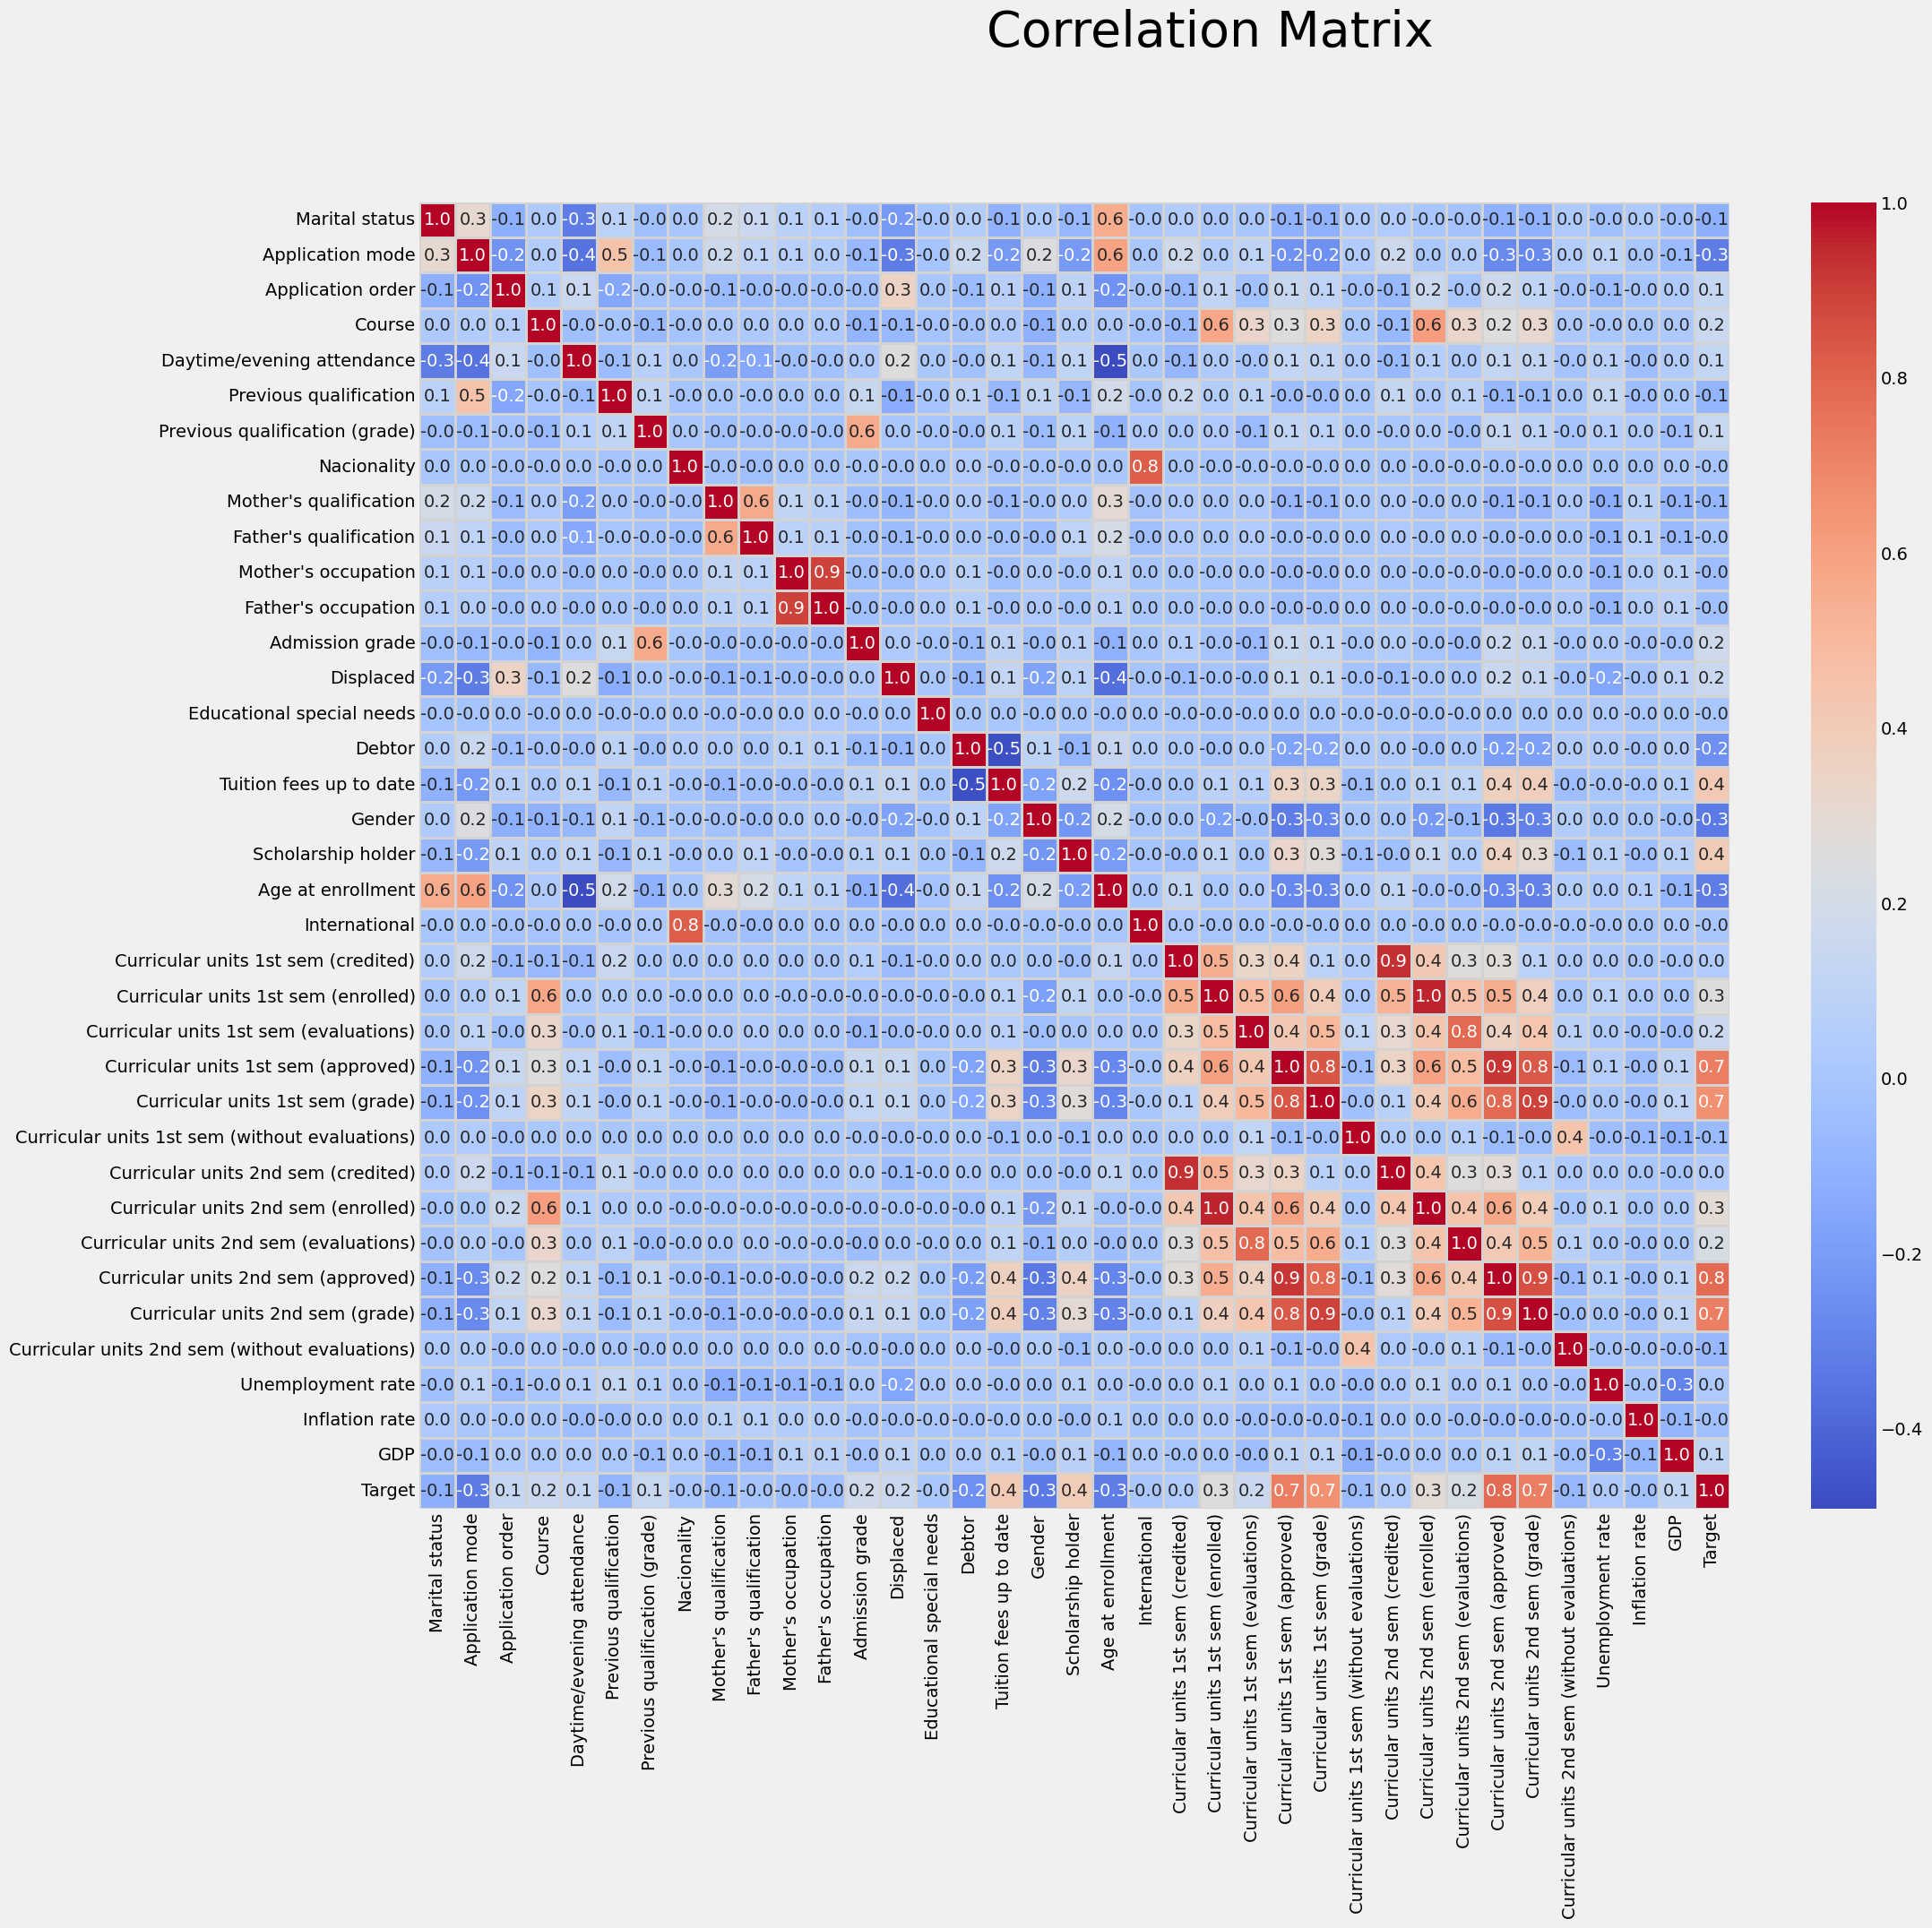

In [18]:
# Correlation matrix
plt.figure(figsize=(21, 18))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm', fmt='.1f', linewidths=2, linecolor='lightgrey')
plt.suptitle('Correlation Matrix', fontsize=40, y=1)
plt.show()

# <p style="background-color: #FDD835; font-family: Times New Roman; color: black; font-size: 120%; text-align: center; border-radius: 15px 15px; padding: 15px;"><strong>3. Modelling</strong></p>

In [19]:
# Split the features and target variable
X_train = train[initial_features]
y_train = train['Target']
X_test = test[initial_features]

In [20]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def cross_validate_model(model, X_train, y_train, params, n_splits=10):
    """
    Performs K-Fold cross-validation for a given model, returns the last model and average validation accuracy.

    Parameters:
        model: Machine learning model class (e.g., RandomForestClassifier)
        X_train: Training feature dataset
        y_train: Training target dataset
        params: Dictionary of parameters to initialize the model
        n_splits: Number of folds for cross-validation (default: 10)

    Returns:
        last_model: The last trained model instance
        average_val_accuracy: Average validation accuracy over all folds
    """
    # Initialize variables
    cv = KFold(n_splits=n_splits, shuffle=True, random_state=0)
    val_scores = []

    # Cross-validation loop
    for fold, (train_ind, valid_ind) in enumerate(cv.split(X_train)):
        # Data splitting
        X_fold_train = X_train.iloc[train_ind]
        y_fold_train = y_train.iloc[train_ind]
        X_val = X_train.iloc[valid_ind]
        y_val = y_train.iloc[valid_ind]
        
        # Model initialization and training
        clf = model(**params)
        clf.fit(X_fold_train, y_fold_train)
        
        # Predict and evaluate
        y_pred_trn = clf.predict(X_fold_train)
        y_pred_val = clf.predict(X_val)
        train_acc = accuracy_score(y_fold_train, y_pred_trn)
        val_acc = accuracy_score(y_val, y_pred_val)
        print(f"Fold: {fold}, Train Accuracy: {train_acc:.5f}, Val Accuracy: {val_acc:.5f}")
        print("-" * 50)
        
        # Accumulate validation scores
        val_scores.append(val_acc)

    # Calculate the average validation score
    average_val_accuracy = np.mean(val_scores)
    print("Average Validation Accuracy:", average_val_accuracy)

    return clf, average_val_accuracy

# <p style="font-family: Times New Roman; font-weight: normal; letter-spacing: 2px; color: #43A047; font-size: 110%; text-align: left; padding: 0px; border-bottom: 2px solid #43A047"><strong>3.1 Random Forest</strong></p>

In [21]:
from sklearn.ensemble import RandomForestClassifier

print('Random Forest Cross-Validation Results:\n')
rf_model, rf_mean_accuracy = cross_validate_model(RandomForestClassifier, X_train, y_train, params={})

Random Forest Cross-Validation Results:

Fold: 0, Train Accuracy: 0.99999, Val Accuracy: 0.82527
--------------------------------------------------
Fold: 1, Train Accuracy: 1.00000, Val Accuracy: 0.82541
--------------------------------------------------
Fold: 2, Train Accuracy: 0.99997, Val Accuracy: 0.82475
--------------------------------------------------
Fold: 3, Train Accuracy: 0.99999, Val Accuracy: 0.81992
--------------------------------------------------
Fold: 4, Train Accuracy: 0.99997, Val Accuracy: 0.82266
--------------------------------------------------
Fold: 5, Train Accuracy: 0.99997, Val Accuracy: 0.83246
--------------------------------------------------
Fold: 6, Train Accuracy: 1.00000, Val Accuracy: 0.82723
--------------------------------------------------
Fold: 7, Train Accuracy: 0.99997, Val Accuracy: 0.83455
--------------------------------------------------
Fold: 8, Train Accuracy: 0.99996, Val Accuracy: 0.82408
-----------------------------------------------

In [22]:
# Predict the test set and reverse the label encoding
rf_preds = rf_model.predict(X_test)
rf_preds_labels = label_encoder.inverse_transform(rf_preds)

# Save the predictions to a CSV file
rf_result = pd.DataFrame(X_test.index)
rf_result['Target'] = rf_preds_labels
rf_result.to_csv('result_rf.csv', index=False)
rf_result

id    Target
0       76518   Dropout
1       76519  Graduate
2       76520  Graduate
3       76521  Graduate
4       76522   Dropout
...       ...       ...
51007  127525   Dropout
51008  127526   Dropout
51009  127527   Dropout
51010  127528   Dropout
51011  127529   Dropout

[51012 rows x 2 columns]

# <p style="font-family: Times New Roman; font-weight: normal; letter-spacing: 2px; color: #43A047; font-size: 110%; text-align: left; padding: 0px; border-bottom: 2px solid #43A047"><strong>3.2 Adaptive Boosting (AdaBoost)</strong></p>

In [23]:
from sklearn.ensemble import AdaBoostClassifier

print('AdaBoost Cross-Validation Results:\n')
ada_model, ada_mean_accuracy = cross_validate_model(AdaBoostClassifier, X_train, y_train, params={})

AdaBoost Cross-Validation Results:

Fold: 0, Train Accuracy: 0.81924, Val Accuracy: 0.81600
--------------------------------------------------
Fold: 1, Train Accuracy: 0.81945, Val Accuracy: 0.81639
--------------------------------------------------
Fold: 2, Train Accuracy: 0.81873, Val Accuracy: 0.81652
--------------------------------------------------
Fold: 3, Train Accuracy: 0.81939, Val Accuracy: 0.81390
--------------------------------------------------
Fold: 4, Train Accuracy: 0.81916, Val Accuracy: 0.81260
--------------------------------------------------
Fold: 5, Train Accuracy: 0.81802, Val Accuracy: 0.82423
--------------------------------------------------
Fold: 6, Train Accuracy: 0.81968, Val Accuracy: 0.82436
--------------------------------------------------
Fold: 7, Train Accuracy: 0.81962, Val Accuracy: 0.82397
--------------------------------------------------
Fold: 8, Train Accuracy: 0.81993, Val Accuracy: 0.82055
--------------------------------------------------
F

In [24]:
# Predict the test set and reverse the label encoding
ada_preds = ada_model.predict(X_test)
ada_preds_labels = label_encoder.inverse_transform(ada_preds)

# Save the predictions to a CSV file
ada_result = pd.DataFrame(X_test.index)
ada_result['Target'] = ada_preds_labels
ada_result.to_csv('result_ada.csv', index=False)
ada_result

id    Target
0       76518   Dropout
1       76519  Graduate
2       76520  Graduate
3       76521  Enrolled
4       76522   Dropout
...       ...       ...
51007  127525   Dropout
51008  127526   Dropout
51009  127527   Dropout
51010  127528   Dropout
51011  127529   Dropout

[51012 rows x 2 columns]

# <p style="font-family: Times New Roman; font-weight: normal; letter-spacing: 2px; color: #43A047; font-size: 110%; text-align: left; padding: 0px; border-bottom: 2px solid #43A047"><strong>3.3 Gradient Boosting</strong></p>

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

print('Gradient Boosting Cross-Validation Results:\n')
gb_model, gb_mean_accuracy = cross_validate_model(GradientBoostingClassifier, X_train, y_train, params={})

Gradient Boosting Cross-Validation Results:

Fold: 0, Train Accuracy: 0.83019, Val Accuracy: 0.82658
--------------------------------------------------
Fold: 1, Train Accuracy: 0.83064, Val Accuracy: 0.82279
--------------------------------------------------
Fold: 2, Train Accuracy: 0.83083, Val Accuracy: 0.82371
--------------------------------------------------
Fold: 3, Train Accuracy: 0.83134, Val Accuracy: 0.82122
--------------------------------------------------
Fold: 4, Train Accuracy: 0.83103, Val Accuracy: 0.82135
--------------------------------------------------
Fold: 5, Train Accuracy: 0.82979, Val Accuracy: 0.83521
--------------------------------------------------
Fold: 6, Train Accuracy: 0.83037, Val Accuracy: 0.83129
--------------------------------------------------
Fold: 7, Train Accuracy: 0.82979, Val Accuracy: 0.83455
--------------------------------------------------
Fold: 8, Train Accuracy: 0.83031, Val Accuracy: 0.82656
-------------------------------------------

In [26]:
# Predict the test set and reverse the label encoding
gb_preds = gb_model.predict(X_test)
gb_preds_labels = label_encoder.inverse_transform(gb_preds)

# Save the predictions to a CSV file
gb_result = pd.DataFrame(X_test.index)
gb_result['Target'] = gb_preds_labels
gb_result.to_csv('result_gb.csv', index=False)
gb_result

id    Target
0       76518   Dropout
1       76519  Graduate
2       76520  Graduate
3       76521  Enrolled
4       76522  Enrolled
...       ...       ...
51007  127525   Dropout
51008  127526   Dropout
51009  127527   Dropout
51010  127528   Dropout
51011  127529   Dropout

[51012 rows x 2 columns]

# <p style="font-family: Times New Roman; font-weight: normal; letter-spacing: 2px; color: #43A047; font-size: 110%; text-align: left; padding: 0px; border-bottom: 2px solid #43A047"><strong>3.4 eXtreme Gradient Boosting (XGBoost)</strong></p>

In [27]:
from xgboost import XGBClassifier

print('XGBoost Cross-Validation Results:\n')
xgb_model, xgb_mean_accuracy = cross_validate_model(XGBClassifier, X_train, y_train, params={})

XGBoost Cross-Validation Results:

Fold: 0, Train Accuracy: 0.87773, Val Accuracy: 0.83063
--------------------------------------------------
Fold: 1, Train Accuracy: 0.87924, Val Accuracy: 0.83037
--------------------------------------------------
Fold: 2, Train Accuracy: 0.87904, Val Accuracy: 0.83155
--------------------------------------------------
Fold: 3, Train Accuracy: 0.87894, Val Accuracy: 0.82475
--------------------------------------------------
Fold: 4, Train Accuracy: 0.87763, Val Accuracy: 0.82723
--------------------------------------------------
Fold: 5, Train Accuracy: 0.87807, Val Accuracy: 0.83599
--------------------------------------------------
Fold: 6, Train Accuracy: 0.87920, Val Accuracy: 0.83364
--------------------------------------------------
Fold: 7, Train Accuracy: 0.87878, Val Accuracy: 0.84083
--------------------------------------------------
Fold: 8, Train Accuracy: 0.87858, Val Accuracy: 0.83100
--------------------------------------------------
Fo

In [28]:
# Predict the test set and reverse the label encoding
xgb_preds = xgb_model.predict(X_test)
xgb_preds_labels = label_encoder.inverse_transform(xgb_preds)

# Save the predictions to a CSV file
xgb_result = pd.DataFrame(X_test.index)
xgb_result['Target'] = xgb_preds_labels
xgb_result.to_csv('result_xgb.csv', index=False)
xgb_result

id    Target
0       76518   Dropout
1       76519  Graduate
2       76520  Graduate
3       76521  Graduate
4       76522  Enrolled
...       ...       ...
51007  127525   Dropout
51008  127526   Dropout
51009  127527   Dropout
51010  127528   Dropout
51011  127529   Dropout

[51012 rows x 2 columns]

# <p style="font-family: Times New Roman; font-weight: normal; letter-spacing: 2px; color: #43A047; font-size: 110%; text-align: left; padding: 0px; border-bottom: 2px solid #43A047"><strong>3.5 Categorical Boosting (CatBoost)</strong></p>

In [29]:
from catboost import CatBoostClassifier

cat_params = {
    'verbose': 0,                       # Silent mode
}

print('CatBoost Cross-Validation Results:\n')
cat_model, cat_mean_accuracy = cross_validate_model(CatBoostClassifier, X_train, y_train, cat_params)

CatBoost Cross-Validation Results:

Fold: 0, Train Accuracy: 0.86175, Val Accuracy: 0.83338
--------------------------------------------------
Fold: 1, Train Accuracy: 0.86247, Val Accuracy: 0.82723
--------------------------------------------------
Fold: 2, Train Accuracy: 0.86135, Val Accuracy: 0.82854
--------------------------------------------------
Fold: 3, Train Accuracy: 0.86269, Val Accuracy: 0.82619
--------------------------------------------------
Fold: 4, Train Accuracy: 0.86237, Val Accuracy: 0.82645
--------------------------------------------------
Fold: 5, Train Accuracy: 0.86112, Val Accuracy: 0.83795
--------------------------------------------------
Fold: 6, Train Accuracy: 0.86119, Val Accuracy: 0.83194
--------------------------------------------------
Fold: 7, Train Accuracy: 0.86029, Val Accuracy: 0.84344
--------------------------------------------------
Fold: 8, Train Accuracy: 0.86189, Val Accuracy: 0.82930
--------------------------------------------------
F

In [30]:
# Predict the test set and reverse the label encoding
cat_preds = cat_model.predict(X_test)
cat_preds_labels = label_encoder.inverse_transform(cat_preds)

# Save the predictions to a CSV file
cat_result = pd.DataFrame(X_test.index)
cat_result['Target'] = cat_preds_labels
cat_result.to_csv('result_cat.csv', index=False)
cat_result

id    Target
0       76518   Dropout
1       76519  Graduate
2       76520  Graduate
3       76521  Graduate
4       76522  Enrolled
...       ...       ...
51007  127525   Dropout
51008  127526   Dropout
51009  127527   Dropout
51010  127528   Dropout
51011  127529   Dropout

[51012 rows x 2 columns]

# <p style="font-family: Times New Roman; font-weight: normal; letter-spacing: 2px; color: #43A047; font-size: 110%; text-align: left; padding: 0px; border-bottom: 2px solid #43A047"><strong>3.6 Light Gradient Boosting Machine (LightGBM)</strong></p>

In [31]:
from lightgbm import LGBMClassifier

lgb_params = {
    'verbose': -1,                    # Set to -1 for silent mode, no process information printed
}

print('LightGBM Cross-Validation Results:\n')
lgb_model, lgb_mean_accuracy = cross_validate_model(LGBMClassifier, X_train, y_train, lgb_params)

LightGBM Cross-Validation Results:

Fold: 0, Train Accuracy: 0.84860, Val Accuracy: 0.83364
--------------------------------------------------
Fold: 1, Train Accuracy: 0.84921, Val Accuracy: 0.82580
--------------------------------------------------
Fold: 2, Train Accuracy: 0.84920, Val Accuracy: 0.83142
--------------------------------------------------
Fold: 3, Train Accuracy: 0.85025, Val Accuracy: 0.82449
--------------------------------------------------
Fold: 4, Train Accuracy: 0.84847, Val Accuracy: 0.82776
--------------------------------------------------
Fold: 5, Train Accuracy: 0.84856, Val Accuracy: 0.83756
--------------------------------------------------
Fold: 6, Train Accuracy: 0.84903, Val Accuracy: 0.83259
--------------------------------------------------
Fold: 7, Train Accuracy: 0.84792, Val Accuracy: 0.84096
--------------------------------------------------
Fold: 8, Train Accuracy: 0.84868, Val Accuracy: 0.83309
--------------------------------------------------
F

In [32]:
# Predict the test set and reverse the label encoding
lgb_preds = lgb_model.predict(X_test)
lgb_preds_labels = label_encoder.inverse_transform(lgb_preds)

# Save the predictions to a CSV file
lgb_result = pd.DataFrame(X_test.index)
lgb_result['Target'] = lgb_preds_labels
lgb_result.to_csv('result_lgb.csv', index=False)
lgb_result

id    Target
0       76518   Dropout
1       76519  Graduate
2       76520  Graduate
3       76521  Enrolled
4       76522  Enrolled
...       ...       ...
51007  127525   Dropout
51008  127526   Dropout
51009  127527   Dropout
51010  127528   Dropout
51011  127529   Dropout

[51012 rows x 2 columns]

# <p style="font-family: Times New Roman; font-weight: normal; letter-spacing: 2px; color: #43A047; font-size: 110%; text-align: left; padding: 0px; border-bottom: 2px solid #43A047"><strong>3.7 Model Scores</strong></p>

In [33]:
accuracy = pd.DataFrame({
    'Model': ['Random Forest', 'AdaBoost', 'Gradient Boosting', 'XGBoost', 'CatBoost', 'LightGBM'],
    'Score': [rf_mean_accuracy, ada_mean_accuracy, gb_mean_accuracy,
              xgb_mean_accuracy, cat_mean_accuracy, lgb_mean_accuracy]
})

accuracy_sorted = accuracy.sort_values(by='Score', ascending=False)
accuracy_sorted

Model     Score
4           CatBoost  0.831765
5           LightGBM  0.831713
3            XGBoost  0.831569
2  Gradient Boosting  0.826917
0      Random Forest  0.826054
1           AdaBoost  0.818971

In [34]:
fig = px.bar(data_frame=accuracy_sorted, x='Score', y='Model', color='Score',
             title='Accuracy Comparison', text='Score')
fig.update_layout(width=600, height=500)
fig.show()

# <p style="background-color: #FDD835; font-family: Times New Roman; color: black; font-size: 120%; text-align: center; border-radius: 15px 15px; padding: 15px;"><strong>4. Feature Importance</strong></p>

In [35]:
def plot_feature_importances(model, model_name, color_scale='Reds', dataframe=None):
    """
    Plots feature importances of a fitted random forest model.

    Parameters:
    model (RandomForest model): The trained random forest model.
    color_scale (str): Color scale for the plot.
    dataframe (pd.DataFrame): DataFrame used to train the model. Must not be None.

    Returns:
    Plotly Figure: A plot showing feature importances.
    """
    if dataframe is None:
        raise ValueError("Dataframe cannot be None and must contain the feature names.")

    # Extracting feature importances and sorting them
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    feature_names = dataframe.columns

    # Creating a DataFrame for the importances
    feature_importances = pd.DataFrame({
        'Feature': feature_names[indices],
        'Importance': importances[indices]
    })

    # Plotting the feature importances
    fig = px.bar(feature_importances.sort_values('Importance', ascending=True), 
                 x='Importance', 
                 y='Feature',
                 title=f"Feature Importances in {model_name}",
                 labels={'Importance': 'Importance', 'Feature': 'Feature'},
                 height=1400,
                 color='Importance',
                 color_continuous_scale=color_scale)

    fig.update_layout(xaxis_title='Importance', yaxis_title='Feature')

    return fig

In [36]:
# Feature importance in random forest
model_name = 'Random Forest'
fig = plot_feature_importances(rf_model, model_name, 'Picnic', X_train)
fig.show()

In [37]:
# Feature importance in AdaBoost
model_name = 'AdaBoost'
fig = plot_feature_importances(ada_model, model_name, 'Rainbow', X_train)
fig.show()

In [38]:
# Feature importance in GBM
model_name = 'Gradient Boosting'
fig = plot_feature_importances(gb_model, model_name, 'HSV', X_train)
fig.show()

In [39]:
# Feature importance in XGBoost
model_name = 'XGBoost'
fig = plot_feature_importances(xgb_model, model_name, 'Bluered', X_train)
fig.show()

In [40]:
# Feature importance in CatBoost
model_name = 'CatBoost'
fig = plot_feature_importances(cat_model, model_name, 'Temps', X_train)
fig.show()

In [41]:
# Feature importance in LightGBM
model_name = 'LightGBM'
fig = plot_feature_importances(lgb_model, model_name, 'Reds', X_train)
fig.show()